#End-to-End Multi-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using Tensorflow 2.0 and TensorFlow Hub

##1. Problem

Identifying the breed of a dog given an image of a dog.

##2. Data

The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

##3. Evalution

The evalution is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

##4. Features

Some information about data:
* We're dealing with images(Unstructured data) so it's probably best we use deep learning/transfer learning
* There are 120 breeds of dog (this means therer are 120 diffrent classes).
* There are aroung 10,000+ images in training set (have labels)
* There are around 10,000+ images in test set(no labels)

In [20]:
#Unzip the uploaded data into Google Drive
#!unzip "/content/drive/MyDrive/Dog-Vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog-Vision/"

### **Get our workspace ready**
* Import TensorFlow
* Import Tesnsorflow Hub
* Make sure we're using GPU

In [21]:
#Import necessary tools

import tensorflow as tf
import tensorflow_hub as hub
print("TF version : ",tf.__version__)
print("TF hub version : ",hub.__version__)

#Check for GPU availability
print("GPU", "available (YESSSSS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version :  2.4.1
TF hub version :  0.11.0
GPU available (YESSSSS!!!!)


## Getting our data ready (turning into Tensors)

With  all machine learning models, our data has to be in numerical format.so that's whar we'll be doing first. Turning out images into Tensors.

Let's start by accessing out data and check out the labels.

In [22]:
import pandas as pd
labels_csv=pd.read_csv("/content/drive/MyDrive/Dog-Vision/labels.csv")
print(labels_csv.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     7ecd9ea72881883e8a0c708425cb9b2b  scottish_deerhound
freq                                   1                 126


In [23]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


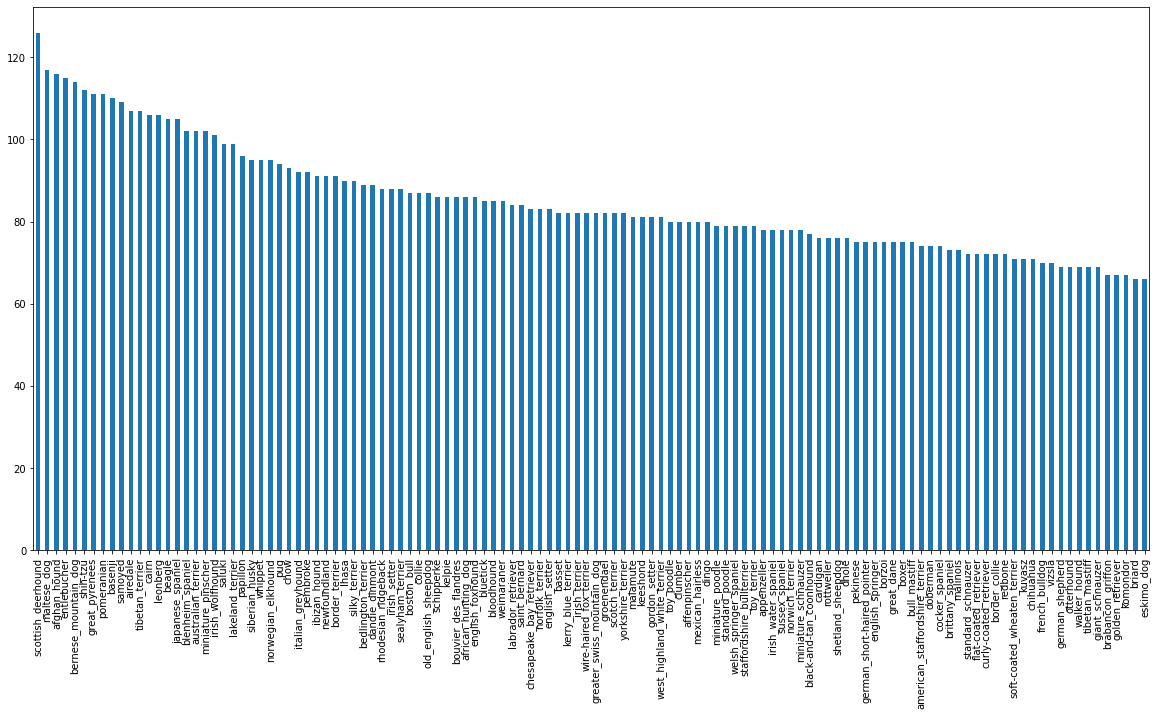

In [24]:
#how many images are therre of each breed?

labels_csv["breed"].value_counts().plot(kind="bar", figsize=(20,10))

In [25]:
labels_csv["breed"].value_counts().median()

82.0

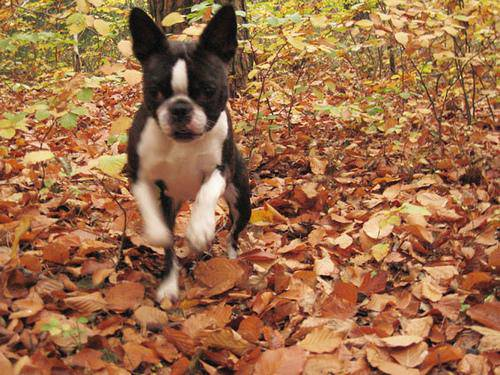

In [26]:
#Let's view an image
from IPython.display import Image
Image("/content/drive/MyDrive/Dog-Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

## Getting images and their labels

Let's get alist of all of our images file pathnames.

In [27]:
#Creat pathnames from image ID's
filenames = ["/content/drive/MyDrive/Dog-Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

In [28]:
#Check the first 10
filenames[:10]

['/content/drive/MyDrive/Dog-Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog-Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog-Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog-Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog-Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog-Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog-Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog-Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog-Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog-Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [29]:
#Check wheather number of filenames match number of actual image files
import os

if len(os.listdir("/content/drive/MyDrive/Dog-Vision/train")) == len(filenames):
  print("Filenames Match actual amount of files..")
else:
  print("Filename do not match actual amount of files, check the target directory") 

Filenames Match actual amount of files..


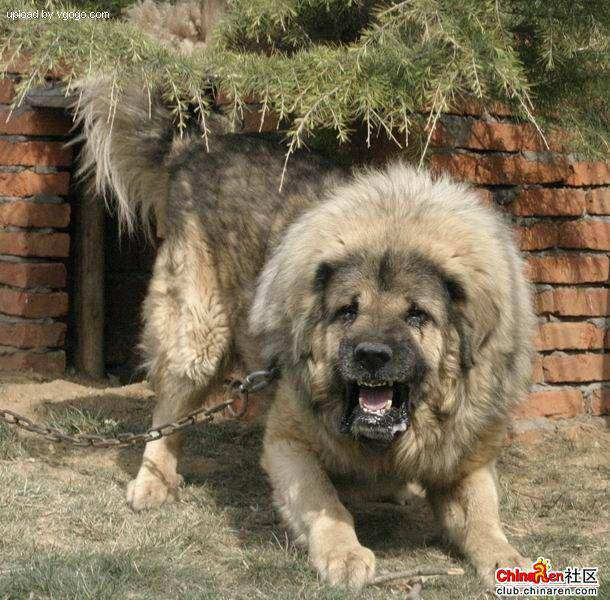

In [30]:
#One more check 
Image(filenames[9000])
#print(labels_csv["breed"][9000])

Since we've now got out training filepaths in a listr, let's prepare our label

In [31]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [32]:
len(labels)

10222

In [33]:
#See if number of labewls matches the number of filenames
if len(labels)==len(filenames):
  print("Matches")
else:
  print("Does'nt match")

Matches


In [34]:
#Find the unique label values
Unique_breeds = np.unique(labels)

In [35]:
len(Unique_breeds)

120

In [36]:
#Turn every label into a boolean array
boolean_labels = [label==Unique_breeds for label in labels]
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [37]:
#Example : Turing boolean array into integers
print(labels[0])# original label
print(np.where(Unique_breeds== labels[0]))# index where label occurs
print(boolean_labels[0].argmax())#index where label occurs in boolean array
print(boolean_labels[0].astype(int))# there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [38]:
type(boolean_labels)

list

##Creating our own validation set
Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own.

In [39]:
#Setup X & y variables
X=filenames
y=boolean_labels

We're going to start off experimenting with ~1000 images and increase as needed

In [40]:
#Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [41]:
# splite our data into train and validation sets
from sklearn.model_selection import train_test_split

# split them into training and validation of total size NUM_IMAGES
X_train, X_valid, y_train, y_valid = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)

len(X_train), len(y_train), len(X_valid), len(y_valid)

(800, 800, 200, 200)

In [42]:
# Let's have geez at the training data
X_train[:2], y_train[:2]

(['/content/drive/MyDrive/Dog-Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/Dog-Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False,

## Preprocessing Images (turing images into Tensors)
 
To preprocess our images into Tensors we're goin gto write a function which does a few things:

1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a variabel `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image (convert color channel values from 0-255 to 0-1)
4. Resize the `image` to be a shape of (224,224)
5. Return the modified `image`

Before we do, Let's see what importing an image looks like...

In [43]:
# COnvert image to Numpy array
from matplotlib.pyplot import imread
image= imread(filenames[2000])
image.shape

(500, 375, 3)

In [44]:
image.min(), image.max()

(0, 255)

In [45]:
image[:1]

array([[[31, 36, 30],
        [28, 33, 27],
        [23, 28, 22],
        ...,
        [51, 57, 31],
        [73, 80, 47],
        [39, 46, 12]]], dtype=uint8)

In [46]:
#turn image into Tensor
tf.constant(image[:1])

<tf.Tensor: shape=(1, 375, 3), dtype=uint8, numpy=
array([[[31, 36, 30],
        [28, 33, 27],
        [23, 28, 22],
        ...,
        [51, 57, 31],
        [73, 80, 47],
        [39, 46, 12]]], dtype=uint8)>

Now we've seen what an image looks like Tensor, let's make function to preprocess them .

In [47]:
#Define image size
IMG_SIZE = 224

#Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Take an image file path, image size and turns the image into a Tensor.
  """

  #Read in an image file
  image = tf.io.read_file(image_path)
  
  #Turn the jpeg image into numerical Tensor with 3 color channels (Red, Green and Blue)
  image = tf.image.decode_jpeg(image, channels=3)

  #Convert the color channel value from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  #Resize the image to our desired value (224,224)
  image = tf.image.resize(image, size=[img_size, img_size])

  return image

## Turning data into batches

Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go....
they all might not fit into memory

So that's why we do about 32 (this is batch size) images at a time (you can manualy adjust the batch size if need to be).

In order to use tensorflow effectively, we need our data in the form of Tensor tuple which look like this:
`(image,label)`

In [48]:
#Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):

  """
  Takes an image file path name and the assoscaited label,
  processes the image and returns a tuple of(image, label).
  """

  image= process_image(image_path)
  return image, label

Now we've got a way to turn our data into tuples of Tensors in the form: `(image,label)`, let's make a function to turn all of our data (X & y) into batches!

In [49]:
# Define the batch size, 32 is good start
BATCH_SIZE = 32

#Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Create batches of data out of images (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accept test data as input (no label).
  """
  # If the data is test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batcehs...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X))) #only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    print("Creating Valid data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                            tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)

    return data_batch

  else:
    print("Creatin training data batches...")
    #Turn filpaths and labels into Tensors
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                             tf.constant(y)))
    #Shuffling pathnames and labels before mapping image preocessor function is faster that than shuffling image
    data = data.shuffle(buffer_size=len(X))
  
    #Create (image, label) tuple (this also turn the image path into a preprocessing image )
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

In [50]:
#Create training and validation data batches

train_data = create_data_batches(X_train, y_train)
valid_data = create_data_batches(X_valid, y_valid ,valid_data=True)

Creatin training data batches...
Creating Valid data batches...


In [51]:
train_data.element_spec,valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is now in batches, however, these can be a little hard to understand/comprehend, let's visualize them!


In [52]:
import matplotlib.pyplot as plt

#Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from data batch.
  """
  fig=plt.figure(figsize=(10,10))
  #loop through 25 (for display 25 images)
  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    ax.imshow(images[i])
    #Add the image label as the title
    ax.set_title(Unique_breeds[labels[i].argmax()])

    #Turn the grid lines off
    plt.axis("off")

In [53]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.1179686 , 0.16502742, 0.07875291],
          [0.11090687, 0.14227942, 0.05992648],
          [0.13861616, 0.15038086, 0.08371419],
          ...,
          [0.09822311, 0.10214468, 0.08253683],
          [0.09411766, 0.09803922, 0.07450981],
          [0.09411766, 0.09803922, 0.07450981]],
 
         [[0.09004024, 0.13301994, 0.03890228],
          [0.13321337, 0.16234604, 0.08073973],
          [0.1614324 , 0.17206806, 0.10596591],
          ...,
          [0.08828788, 0.09220946, 0.07260161],
          [0.09019608, 0.09411766, 0.07058824],
          [0.09019608, 0.09411766, 0.07058824]],
 
         [[0.21089962, 0.24227217, 0.15207608],
          [0.22086869, 0.24242409, 0.16513051],
          [0.15428524, 0.16085301, 0.10198173],
          ...,
          [0.08452388, 0.08844545, 0.06491604],
          [0.08627451, 0.09019608, 0.06666667],
          [0.08627451, 0.09019608, 0.06666667]],
 
         ...,
 
         [[0.3784181 , 0.4127799 , 0.25518328],
          [0.31248

In [54]:
len(train_images), len(train_labels)

(32, 32)

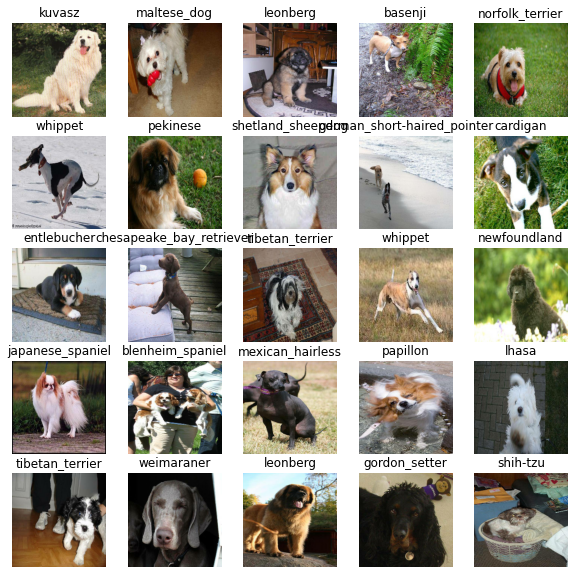

In [55]:
#Now let's visualize the data in a training batch
show_25_images(train_images, train_labels)

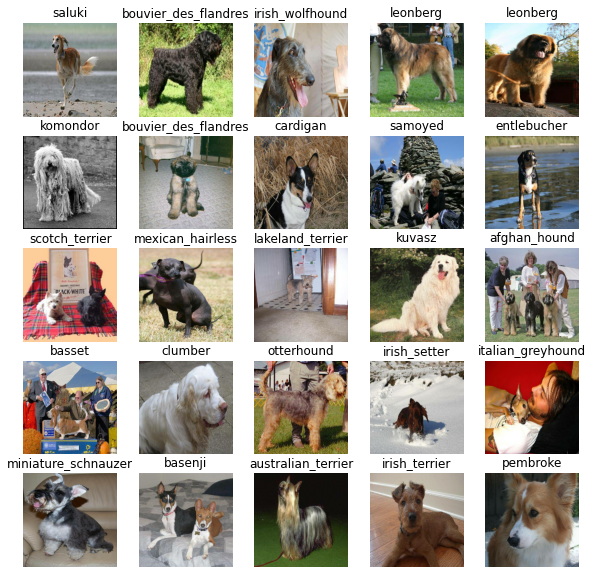

In [56]:
#Now let's visualize our validation data
valid_images, valid_labels = next(train_data.as_numpy_iterator())
show_25_images(valid_images,valid_labels)

##Buliding a model

Before we building a model, there are a few things we nee to define:

* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use.
  from Tensorflow Hub : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [57]:
#Set input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch ,height, width, color channels

#Setup output shape of model
OUTPUT_SHAPE = len(Unique_breeds)

#Setup model URL from Tensorflow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"


Now we've got our inputs, outputs, and model ready to go.
Let's put them togather into a keras deep learning model!

Knowing this, let's create a functio nwhich:
* Take the input shape, output shape and the model we've chosen as parameters.
* Define the layer in keras model in sequential fastion (do this first, then this, then that).
* Compiles the model (says it should be evaluated and improved).
* Building the model (tells the model the inputs shape it'll be getting).
* Return the model

In [58]:
#Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with : ",MODEL_URL)

  #Setup the model layers
  model =tf.keras.Sequential([
                              hub.KerasLayer(MODEL_URL), # Layer 1 (Input layer)
                              tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )
  
  #Build the model
  model.build(INPUT_SHAPE)

  return model

In [59]:
model = create_model()
model.summary()

Building model with :  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks
 
 Callbacks are helper function a model can use during trainging to do such things as save it progress, check it progress or stop training if a model stops improving

 We'll create two callbacks, one for TensorBoard which helps track our model progress and another for early-stopping which prevents our model from training for too long.

 ### TensorBoard Callback
 To setup TensorBoard callback, we need to do 3 things:
 1. Load the TensorBoard norebook extension
 2. Create a TensorBoard callback which is able to save logs
 to directory and pass it to our model's `fit()` function
 3. Visualize our model training logs with the `%tensorboard` magic function (we'll do this after model training).

In [ ]:
#Load TensorBoard notebook extension
%load_ext tensorboard 

In [ ]:
import datetime

# Craete a function to build TensorBoard callback
def create_tensorboard_callback():
   # create a log directory for storing TensorBoard logs
   logdir= os.path.join("/content/drive/MyDrive/Dog-Vision/logs",
                        #Make it so the  log get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
                        )
   return tf.keras.callbacks.TensorBoard(logdir)

###Early stopping callback

Early stopping helps stop our model from overfitting by stopping  training if a certain evalution metric stops improving

In [ ]:
#create early stoping call back
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model (on subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working.

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10 , max:100 , step:10}

In [ ]:
#Cheak to make sur we are running on GPU
print("GPU" , "available" if tf.config.list_physical_devices("GPU") else " not availble")

Let's create a function which train a model

* Create a model using `create_model()`
* Setup a TensorBoard callbacks using 'create_tensorboard_callback()'
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (`NUM_EPOCHS`) and callbacks  we'd like to use
* Return the model

In [ ]:
#Build a function to train and return a trained model

def train_model():
  """
  Train a given model returns the trained version.
  """

  #Create a model
  model = create_model()

  #Create new TensorBoard seesion everyrime we train a model
  tensorboard = create_tensorboard_callback()

  #Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=valid_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  
  #Return the fitted model
  return model

In [ ]:
#Fit the moodel to the data
model=train_model()

###Checkin the TensorBoard logs

The TensorBoard fuction (%tensorboard) will access the logs directory we create earlier and visualize its content.

In [ ]:
%tensorboard --logdir /content/drive/MyDrive/Dog-Vision/logs

##Makeing and evaluting prediction using a train model

In [ ]:
#Make prediction on validation data (not used to train on)
predictions= model.predict(valid_data, verbose=1)
predictions

In [ ]:
predictions.shape

In [ ]:
#First prediction
index= 42
print(predictions[index])
print(f"Max value (probability of prediction) : {np.max(predictions[index])}")
print(f"Sum : {np.sum(predictions[index])}")
print(f"Index number : {predictions[index].argmax()}")
print(f"Predicted label : {Unique_breeds[predictions[index].argmax()]}")

Having the above functionality is great but we want to be able to do it at scale.
And it would be even better if we could see the image the prediction is being made on!

**Note :** Prediction probabilities are also known as confidence levels.

In [ ]:
#Turn prediction probabiltites into their respective label (easier to understand)

def get_pred_label(prediction_probabilities):
  """
  Turns an array of predictio nprobabilities into a label.
  """
  return Unique_breeds[np.argmax(prediction_probabilities)]

# Get a prediction label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[25])
pred_label

Now since our validation data is still in batch dataset,
we'll have to unbatchify it to make prediction on the validation images and then compare those prediction to the validation laebls (truth labels).

In [ ]:
valid_data

In [ ]:
#Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of the images and labels.
  """
  images = []
  labels =[]

  #Loop throug unbatch data
  for image,label in valid_data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(Unique_breeds[np.argmax(label)])
  return images, labels

#Unbatchify validation data

val_images, val_labels = unbatchify(valid_data)

In [ ]:
val_images[0] , val_labels[0]

In [ ]:
get_pred_label(val_labels[34])

Now we've got ways to get:
* Predictino labels
* Validation labels(truth labels)
* Validation images

let's make some function to make these all a bit more
visaulize.

we'll create a function which:
* Take an array of prediction probabilities, an array of truth labels and an array of images and integers.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot.

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """

  pred_prob, true_label, image =prediction_probabilities[n], labels[n], images[n]

  #Get the pred label 
  pred_label = get_pred_label(pred_prob)

  #Plot images & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  
  #Change the color of the title depending on if the prediction is right or wrong

  if pred_label == true_label:
    color="green"
  else:
    color="red"

  #Change plot title to be predicted, probability of prediction and truth label
  plt.title("prediction : {} \n pred_probability : {:.2f}% \n True_label : {}".format(pred_label, np.max(pred_prob)*100, true_label), color=color)
  

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=74)

Now've got one function to visualize our model top prediction, let's make another to view our model top 10 predictions

This function will:
* Take an input of prediction probabilities array and a ground thruth array and an integer
* Find the top 10:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels
* Plot top 10 prediction probability values and labels, coloring the true label green

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidence along with the truth label for sample n.
  """

  pred_prob, true_label =prediction_probabilities[n], labels[n]

  #Get the predicted label
  pred_label  = get_pred_label(pred_prob)

  #Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  #Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  #Find top_10_pred_labels
  top_10_pred_labels = Unique_breeds[top_10_pred_indexes]

  #Setup plot

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels= top_10_pred_labels,
             rotation="vertical")
 

  

  #Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

Now we've got some function to help  us viusalize our predictino and evalute our model, Let's check out a few.

In [ ]:
#Let's check out few predictions and their different values

i_multiplier = 10
num_rows = 3
num_cols= 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols , 5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout()



##Saving and reloading a trained Model


In [61]:
#Create a function to save model
def save_model(model, suffix=None):
  """
  save a given model in a models directory and appends a suffix (string).
  """
  #create a model directory pathname with current time
  modeldir=os.path.join("/content/drive/MyDrive/Dog-Vision/models",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

  model_path =modeldir + "-" + suffix + ".h5" #save format of model

  print(f"Saving model to : {model_path}")
  model.save(model_path)
  return model_path
  

In [62]:
#Create a function to a train model
def load_model(model_path):
  """
  Loads a saved model from specified path.
  """
  print(f"Loading saved moodel from : {model_path}")
  model=tf.keras.models.load_model(model_path, custom_objects={"KerasLayer":hub.KerasLayer})

  return model

Now we've got fuction to save and load a trained model, let's make sure thry work!

In [ ]:
#Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

In [ ]:
#load a trained  model 
loaded_1000_image_model=load_model("/content/drive/MyDrive/Dog-Vision/models/20210320-110517-1000-images-mobilenetv2-Adam.h5")


In [ ]:
#Evaluate the pre_saved model
model.evaluate(valid_data)


In [ ]:

#Evaluate the loaded model
loaded_1000_image_model.evaluate(valid_data)

##Traing a model on the full data

In [ ]:
len(X), len(y)

In [ ]:
#Create a data batch with full data set
full_data = create_data_batches(X,y)

In [ ]:
full_data

In [ ]:
#Create a model for full model
full_model = create_model()

In [ ]:
#Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()

full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

**Note :** Running the cell below will take little while
(Maybe up to 30 minutes for the first epoch) because the GPU we're using the runtime has to load all the images into memory.

In [ ]:
# fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

In [ ]:
save_model(full_model,suffix="full_data_trained_model_mobilenetv2_Adam")

In [63]:
# Load in the full model
loaded_full_model = load_model("/content/drive/MyDrive/Dog-Vision/models/20210320-141158-full_data_trained_model_mobilenetv2_Adam.h5")

Loading saved moodel from : /content/drive/MyDrive/Dog-Vision/models/20210320-141158-full_data_trained_model_mobilenetv2_Adam.h5


## Making prediction on test data

Since our model has been trained on images in tghe form of Tensor batches, to make predictions on the test data, we'll have to get it into same format.

Luckily we created `create_data_batches()` earlier which can take a list of filenames as input and conver them into Tensor batches.

To make predictions on the test data, we'll:
* Get the test images filenames
* convert the filenames into test data batches using  `create_data_batches()` and setting the `test_data` parameter to `True` (since the test data doestn't have labels).
* Make prediction array by passing the test batches to the `predict()` method called on our model

In [64]:
#Load test images filenames

test_path = "/content/drive/MyDrive/Dog-Vision/test/"
test_filenames = [test_path + images for images in os.listdir(test_path)]

In [65]:
test_filenames[:10]

['/content/drive/MyDrive/Dog-Vision/test/e08d42b2e6f2dbcf24c6bfee8b7d03bd.jpg',
 '/content/drive/MyDrive/Dog-Vision/test/e4897fe96990006c10ec7336772cbd37.jpg',
 '/content/drive/MyDrive/Dog-Vision/test/e78b4a09e5f86c330e24c6aaed63f0be.jpg',
 '/content/drive/MyDrive/Dog-Vision/test/e119301e11d4f1620948c3e6f5a3f021.jpg',
 '/content/drive/MyDrive/Dog-Vision/test/e280f6f772fa8439dcf0957a0e8b8e1d.jpg',
 '/content/drive/MyDrive/Dog-Vision/test/e36ec4ab8218060660ec82fd6c4757a7.jpg',
 '/content/drive/MyDrive/Dog-Vision/test/e7dc8cc599049ea9fa2a172c88646c57.jpg',
 '/content/drive/MyDrive/Dog-Vision/test/dd2c0c44f98af0cf223572a1aa189779.jpg',
 '/content/drive/MyDrive/Dog-Vision/test/e19900119c7d3ce48d4035cd0211be72.jpg',
 '/content/drive/MyDrive/Dog-Vision/test/e78d3997b4e7f4abc1299f81b8e3b2d9.jpg']

In [66]:
len(test_filenames)

10357

In [67]:
#Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batcehs...


In [68]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

**Note :** calling `predict()` on ourfull model and passing it the test data batch will take a long time to run (about ~ 1 hour)

In [69]:
#Make prediction on test data batch using loaded full model
test_predictions = loaded_full_model.predict(test_data,verbose=1)

324/324 [==============================] - 2199s 7s/step


In [70]:
test_predictions

array([[1.4655557e-14, 9.9998617e-01, 7.9834663e-12, ..., 2.4757232e-10,
        1.9368121e-10, 1.5018461e-09],
       [5.9425111e-11, 9.2672657e-08, 7.5583531e-09, ..., 6.2478452e-06,
        2.1222744e-10, 1.7899146e-06],
       [2.5554302e-06, 3.1431504e-09, 2.5407275e-07, ..., 9.2960334e-05,
        7.2865364e-10, 1.6728015e-09],
       ...,
       [6.4444083e-13, 6.7567596e-10, 4.2951723e-12, ..., 1.5650524e-11,
        7.1564803e-16, 4.6602344e-11],
       [4.3816190e-08, 1.0275478e-08, 1.3515545e-08, ..., 1.2015622e-10,
        3.9065180e-06, 3.2375931e-09],
       [1.5765896e-11, 1.4726618e-09, 3.3017344e-10, ..., 5.5467086e-10,
        1.6741993e-09, 1.7712882e-12]], dtype=float32)

In [72]:
#Save prediction (numpy array) to csv file (for acces later)
np.savetxt("/content/drive/MyDrive/Dog-Vision/preds_array.csv", test_predictions, delimiter=",")

In [73]:
#Load prediction (NumPy array) from csv file
test_predictions = np.loadtxt("/content/drive/MyDrive/Dog-Vision/preds_array.csv",delimiter=",")

In [74]:
test_predictions

array([[1.46555572e-14, 9.99986172e-01, 7.98346632e-12, ...,
        2.47572324e-10, 1.93681210e-10, 1.50184609e-09],
       [5.94251107e-11, 9.26726571e-08, 7.55835305e-09, ...,
        6.24784525e-06, 2.12227444e-10, 1.78991456e-06],
       [2.55543023e-06, 3.14315041e-09, 2.54072745e-07, ...,
        9.29603339e-05, 7.28653637e-10, 1.67280145e-09],
       ...,
       [6.44440827e-13, 6.75675960e-10, 4.29517229e-12, ...,
        1.56505243e-11, 7.15648026e-16, 4.66023435e-11],
       [4.38161898e-08, 1.02754782e-08, 1.35155451e-08, ...,
        1.20156218e-10, 3.90651803e-06, 3.23759308e-09],
       [1.57658955e-11, 1.47266177e-09, 3.30173444e-10, ...,
        5.54670865e-10, 1.67419933e-09, 1.77128819e-12]])

In [75]:
test_predictions.shape

(10357, 120)

## Preparing test dataset prediction for Kaggle

Looking at the Kaggle sample submission, we find that it wants our prediction probability outputs in a DataFrame with ID and a column for each diffrent dog breed.
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

In [77]:
#Create a pandas DataFrame with empty columns
pred_df=pd.DataFrame(columns=["id"] + list(Unique_breeds))

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


os.path.splitext() : https://www.geeksforgeeks.org/python-os-path-splitext-method/

In [81]:
#Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(fname)[0] for fname in os.listdir(test_path)]
test_ids

['e08d42b2e6f2dbcf24c6bfee8b7d03bd',
 'e4897fe96990006c10ec7336772cbd37',
 'e78b4a09e5f86c330e24c6aaed63f0be',
 'e119301e11d4f1620948c3e6f5a3f021',
 'e280f6f772fa8439dcf0957a0e8b8e1d',
 'e36ec4ab8218060660ec82fd6c4757a7',
 'e7dc8cc599049ea9fa2a172c88646c57',
 'dd2c0c44f98af0cf223572a1aa189779',
 'e19900119c7d3ce48d4035cd0211be72',
 'e78d3997b4e7f4abc1299f81b8e3b2d9',
 'e291c3955198350ab26495e9290dbe34',
 'e91094730afaa4ade3d3041d96d57f3a',
 'f082ee9b91ad597fdf11cc08771bbb50',
 'ec9a95ba1bab38eeff6b6aa40d5f4edf',
 'f0ceb5eb780eba366f9a077486fe003d',
 'f56b4140707da82fe91cb9e5df4ce68c',
 'ef69016a79094a8bd47f42ccc14ba63a',
 'ef119ef06b97f22d32dbd5cfc08bf60c',
 'ea02c2e76cd1c51e5a07280ca363dbc5',
 'e9f806911b69ca8fe705006ab7b49bdf',
 'f49dbff2463687f867bfe1bc88f0a7c3',
 'f1040b51b35ad34a0d35068af4e9cc2f',
 'f191370aae3cc8e282cfd72ecdcc2226',
 'f1dcabbeb1dbebb326a4b029b6f8b188',
 'ed1f9841f56f9e0122782f734919f521',
 'edf9eccee2542eb4fdc5757da38f0b46',
 'e816f0027a2c6348dbf12b79c70541bc',
 

In [83]:
pred_df["id"] = test_ids

In [84]:
pred_df

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e08d42b2e6f2dbcf24c6bfee8b7d03bd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e4897fe96990006c10ec7336772cbd37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e78b4a09e5f86c330e24c6aaed63f0be,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e119301e11d4f1620948c3e6f5a3f021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e280f6f772fa8439dcf0957a0e8b8e1d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,079f17fc6713f7089e13d0e009bb62b4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10353,07a61998ec9044e9c977274476e07681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10354,07ad25df7e380e29aa4a5788a96cef73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [87]:
pred_df[list(Unique_breeds)] = test_predictions

In [88]:
pred_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e08d42b2e6f2dbcf24c6bfee8b7d03bd,1.46556e-14,0.999986,7.98347e-12,1.47395e-09,1.59503e-11,7.21892e-12,5.47614e-10,3.86628e-12,5.32483e-13,2.98889e-14,1.3133e-11,4.56021e-10,3.02719e-10,2.66161e-10,3.20564e-11,5.85795e-10,7.0351e-12,9.91338e-16,8.48116e-09,2.88965e-12,3.91378e-13,1.45869e-11,1.7046e-13,1.728e-08,1.01688e-13,3.39629e-10,7.87883e-15,4.8749e-13,3.65091e-14,2.22803e-13,2.24761e-11,5.43601e-12,5.41307e-09,1.35776e-05,2.32284e-12,9.39975e-14,1.3608e-12,1.23739e-11,2.20612e-12,...,9.79524e-15,1.73236e-12,3.12554e-10,3.09835e-09,1.19362e-11,5.49465e-10,5.22621e-12,2.3841e-10,2.88424e-13,4.07935e-12,3.68744e-09,1.2406e-10,1.33567e-12,8.97109e-08,5.36536e-13,5.37618e-12,1.11165e-12,2.98129e-08,6.37604e-12,4.24113e-09,1.12895e-09,6.75834e-13,9.00569e-10,1.7873e-12,6.66746e-12,4.00967e-10,6.29929e-11,8.066e-11,1.79664e-10,5.90165e-08,7.71502e-11,5.63996e-13,1.44381e-10,2.62417e-09,2.46534e-10,1.25013e-09,1.29345e-13,2.47572e-10,1.93681e-10,1.50185e-09
1,e4897fe96990006c10ec7336772cbd37,5.94251e-11,9.26727e-08,7.55835e-09,3.71645e-17,2.35991e-11,2.10911e-12,2.08233e-09,2.57276e-10,2.39845e-12,1.54769e-08,4.0053e-10,1.93132e-08,5.63602e-12,2.54339e-10,7.01387e-11,9.15349e-11,8.39981e-11,4.4747e-08,0.000366855,1.68521e-14,7.88029e-10,4.46524e-07,3.34858e-10,1.56305e-08,4.86238e-11,7.12523e-12,1.64623e-05,1.19653e-08,1.18495e-09,7.04334e-08,1.43423e-08,1.6043e-07,1.63268e-10,8.74025e-10,1.68123e-14,8.66495e-12,6.51089e-08,5.45293e-11,1.28772e-12,...,6.21486e-10,5.08163e-13,4.70854e-11,5.13786e-11,1.15757e-07,1.18312e-06,3.39422e-12,1.14151e-05,5.28824e-08,6.82929e-11,2.00347e-06,3.31026e-11,7.83527e-12,0.000262399,1.4892e-05,1.16109e-13,4.52415e-07,3.42437e-10,0.000797359,2.75486e-08,7.79904e-07,2.21521e-09,1.2912e-12,1.73779e-07,2.13437e-08,9.60636e-11,1.08627e-11,6.81244e-12,4.91476e-11,1.09629e-12,1.0025e-14,1.1117e-08,4.39186e-12,1.1161e-09,2.87706e-12,1.38215e-15,7.16508e-08,6.24785e-06,2.12227e-10,1.78991e-06
2,e78b4a09e5f86c330e24c6aaed63f0be,2.55543e-06,3.14315e-09,2.54073e-07,1.1799e-08,0.00293479,4.4756e-05,2.91811e-11,4.78833e-05,4.02985e-08,3.36515e-08,1.51801e-09,1.78415e-11,1.96268e-07,1.62394e-07,2.26782e-06,1.94804e-05,0.000120591,0.00017167,3.83324e-10,0.000625708,9.97445e-07,0.000419752,2.06844e-05,1.57623e-09,1.58587e-08,2.46646e-06,3.8448e-11,1.7e-07,2.43796e-08,1.79617e-07,1.96963e-05,1.84089e-05,0.00232952,0.000144529,3.55624e-06,2.30732e-07,4.1426e-07,1.12598e-10,1.44331e-08,...,9.25053e-08,5.5759e-08,1.12382e-11,1.45155e-12,6.34568e-07,3.43088e-05,9.78259e-08,8.26324e-08,0.000296822,0.000220492,1.39589e-07,6.2364e-07,1.00472e-05,2.09069e-10,1.20752e-09,2.49567e-05,3.75507e-10,7.42948e-10,3.95368e-08,6.0403e-10,5.08788e-08,7.61757e-06,1.12198e-11,1.12791e-09,0.961301,1.44447e-05,1.67928e-09,1.45563e-06,2.4487e-07,6.48135e-06,3.76193e-08,1.7086e-10,6.95971e-09,4.10277e-07,1.26151e-08,3.27046e-08,9.56077e-07,9.29603e

In [89]:
#Save our prediction dataframe to CSV for submission to kaggle
pred_df.to_csv("/content/drive/MyDrive/Dog-Vision/full_model_prediction.csv",index=False)

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [92]:
#Make predictions on custom images
my_dog_path = "/content/drive/MyDrive/Dog-Vision/My dog (saint_bernard)/"
my_dog_image = [my_dog_path + fname for fname in os.listdir(my_dog_path)]

In [93]:
#Turn image into batch datasets
my_dog_data = create_data_batches(my_dog_image, test_data =True)

Creating test data batcehs...


In [94]:
#make prediction on my dog data
my_dog_pred  = loaded_full_model.predict(my_dog_data)

In [96]:
#prediction labe
Unique_breeds[np.argmax(my_dog_pred)]

'saint_bernard'

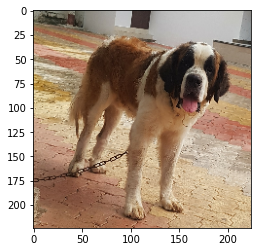

In [101]:
for image in my_dog_data.unbatch().as_numpy_iterator():
  plt.imshow(image)